# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = "Imperial"
query_url = url + "&units=" + "&q="
search_data = []
city_List = []
country_List = []

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
searchCnt = 0
print("Pull API Calls from Database")
print("--------------------------------------")
for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt +=1
        response = requests.get(query_url + city)
        jpull = response.json()
        country = jpull['sys']['country']
        searchCityID = jpull ['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(country)
        print(f"Record found city: {city} with city id: {searchCityID}")
    except:
        print(f"No weather record found for city: {city}")
        pass
    
print("--------------------")
print("Processing Complete")
# Begin API Call to OpenWeather Database
len(search_data)
lat_info = [data.get("coord").get("lat") for data in search_data]
lng_info = [data.get("coord").get("lng") for data in search_data]
temp_info = [data.get("main").get("temp") for data in search_data]
humid_info = [data.get("main").get("humidity") for data in search_data]
cloud_info = [data.get("clouds").get("all") for data in search_data]
wind_info = [data.get("wind").get("speed") for data in search_data]
weather_info = pd.DataFrame({"cityName":city_List,
                            "country":country_List,
                            "lat":lat_info,
                            "lng":lng_info,
                            "temp":temp_info,
                            "humidity":humid_info,
                            "cloudiness":cloud_info,
                            "winds":wind_info})
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame

Pull API Calls from Database
--------------------------------------
Processing record 0 for the city: cape town
Record found city: cape town with city id: 3369157
Processing record 1 for the city: rikitea
Record found city: rikitea with city id: 4030556
Processing record 2 for the city: kapoeta
No weather record found for city: kapoeta
Processing record 3 for the city: hermanus
Record found city: hermanus with city id: 3366880
Processing record 4 for the city: vaini
Record found city: vaini with city id: 1273574
Processing record 5 for the city: port elizabeth
Record found city: port elizabeth with city id: 4501427
Processing record 6 for the city: bredasdorp
Record found city: bredasdorp with city id: 1015776
Processing record 7 for the city: mataura
Record found city: mataura with city id: 6201424
Processing record 8 for the city: thompson
Record found city: thompson with city id: 6165406
Processing record 9 for the city: puertollano
Record found city: puertollano with city id: 25121

Record found city: neiafu with city id: 4032420
Processing record 89 for the city: kloulklubed
Record found city: kloulklubed with city id: 7671223
Processing record 90 for the city: saskylakh
Record found city: saskylakh with city id: 2017155
Processing record 91 for the city: talnakh
Record found city: talnakh with city id: 1490256
Processing record 92 for the city: giyani
Record found city: giyani with city id: 1001860
Processing record 93 for the city: solenzo
Record found city: solenzo with city id: 2597250
Processing record 94 for the city: sechura
Record found city: sechura with city id: 3691954
Processing record 95 for the city: bridgeton
Record found city: bridgeton with city id: 4378391
Processing record 96 for the city: barentsburg
No weather record found for city: barentsburg
Processing record 97 for the city: amderma
No weather record found for city: amderma
Processing record 98 for the city: yuncheng
Record found city: yuncheng with city id: 1785738
Processing record 99 f

Record found city: stillwater with city id: 4552215
Processing record 177 for the city: nakasongola
Record found city: nakasongola with city id: 228418
Processing record 178 for the city: bubaque
Record found city: bubaque with city id: 2374583
Processing record 179 for the city: aswan
Record found city: aswan with city id: 359792
Processing record 180 for the city: acapulco
Record found city: acapulco with city id: 3533462
Processing record 181 for the city: shenkursk
Record found city: shenkursk with city id: 494884
Processing record 182 for the city: qui nhon
No weather record found for city: qui nhon
Processing record 183 for the city: saint-joseph
Record found city: saint-joseph with city id: 3037456
Processing record 184 for the city: indianola
Record found city: indianola with city id: 5697383
Processing record 185 for the city: hanting
Record found city: hanting with city id: 1808880
Processing record 186 for the city: longyearbyen
Record found city: longyearbyen with city id: 

Record found city: kitgum with city id: 230893
Processing record 264 for the city: indiana
Record found city: indiana with city id: 5194868
Processing record 265 for the city: tecoanapa
Record found city: tecoanapa with city id: 3532499
Processing record 266 for the city: matara
Record found city: matara with city id: 425378
Processing record 267 for the city: sabrum
Record found city: sabrum with city id: 1257908
Processing record 268 for the city: waipawa
Record found city: waipawa with city id: 2185329
Processing record 269 for the city: tilichiki
Record found city: tilichiki with city id: 2120591
Processing record 270 for the city: portland
Record found city: portland with city id: 4975802
Processing record 271 for the city: arraial do cabo
Record found city: arraial do cabo with city id: 3471451
Processing record 272 for the city: constantine
Record found city: constantine with city id: 2501152
Processing record 273 for the city: buta
Record found city: buta with city id: 217570
P

Record found city: basoko with city id: 219414
Processing record 351 for the city: lima
Record found city: lima with city id: 3936456
Processing record 352 for the city: anadyr
Record found city: anadyr with city id: 2127202
Processing record 353 for the city: romny
Record found city: romny with city id: 695464
Processing record 354 for the city: durban
Record found city: durban with city id: 5898322
Processing record 355 for the city: lisakovsk
Record found city: lisakovsk with city id: 1521315
Processing record 356 for the city: ambilobe
Record found city: ambilobe with city id: 1082243
Processing record 357 for the city: mount gambier
Record found city: mount gambier with city id: 2156643
Processing record 358 for the city: kitimat
Record found city: kitimat with city id: 5993072
Processing record 359 for the city: pisco
Record found city: pisco with city id: 3932145
Processing record 360 for the city: samarai
Record found city: samarai with city id: 2132606
Processing record 361 fo

Record found city: niort with city id: 6454744
Processing record 438 for the city: kangasala
Record found city: kangasala with city id: 654441
Processing record 439 for the city: khoy
Record found city: khoy with city id: 126972
Processing record 440 for the city: pangnirtung
Record found city: pangnirtung with city id: 6096551
Processing record 441 for the city: puerto gaitan
No weather record found for city: puerto gaitan
Processing record 442 for the city: kapustin yar
Record found city: kapustin yar with city id: 552999
Processing record 443 for the city: namikupa
Record found city: namikupa with city id: 877631
Processing record 444 for the city: kiunga
Record found city: kiunga with city id: 2093846
Processing record 445 for the city: bonoua
Record found city: bonoua with city id: 2291087
Processing record 446 for the city: san jose
Record found city: san jose with city id: 3602137
Processing record 447 for the city: artyk
No weather record found for city: artyk
Processing record

No weather record found for city: attawapiskat
Processing record 525 for the city: corrales
Record found city: corrales with city id: 3685794
Processing record 526 for the city: ngunguru
Record found city: ngunguru with city id: 2186111
Processing record 527 for the city: praia da vitoria
Record found city: praia da vitoria with city id: 3372760
Processing record 528 for the city: bilma
Record found city: bilma with city id: 2446796
Processing record 529 for the city: kovdor
Record found city: kovdor with city id: 543508
Processing record 530 for the city: necochea
Record found city: necochea with city id: 3430443
Processing record 531 for the city: kalang
Record found city: kalang with city id: 2176295
Processing record 532 for the city: palmas bellas
Record found city: palmas bellas with city id: 3703523
Processing record 533 for the city: tevaitoa
Record found city: tevaitoa with city id: 4033375
Processing record 534 for the city: bilibino
Record found city: bilibino with city id: 

Record found city: goderich with city id: 5962442
Processing record 611 for the city: kokkola
Record found city: kokkola with city id: 651951
Processing record 612 for the city: paracuru
Record found city: paracuru with city id: 3393115
Processing record 613 for the city: qaqortoq
Record found city: qaqortoq with city id: 3420846
Processing record 614 for the city: oksfjord
Record found city: oksfjord with city id: 778362
Processing record 615 for the city: corowa
Record found city: corowa with city id: 2170260
Processing record 616 for the city: bell ville
Record found city: bell ville with city id: 3864331
Processing record 617 for the city: nowy dwor gdanski
Record found city: nowy dwor gdanski with city id: 3090502
Processing record 618 for the city: lakatoro
Record found city: lakatoro with city id: 2136697
Processing record 619 for the city: ust-ishim
Record found city: ust-ishim with city id: 1488206
Processing record 620 for the city: ajra
Record found city: ajra with city id: 

In [6]:
weather_info = weather_info[["cityName","country", "cloudiness","country", "humidity", "lat","lng","temp","winds"]]
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 9 columns):
cityName      571 non-null object
country       571 non-null object
cloudiness    571 non-null int64
country       571 non-null object
humidity      571 non-null int64
lat           571 non-null float64
lng           0 non-null object
temp          571 non-null float64
winds         571 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 40.2+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

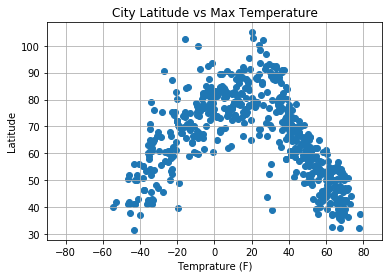

In [7]:
plt.scatter(weather_info["lat"], weather_info["temp"], marker="o")
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Temprature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

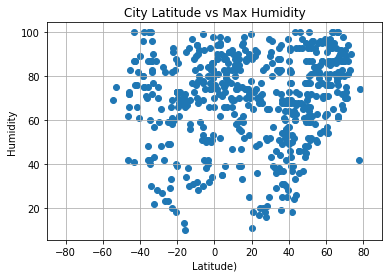

In [8]:
# Latitude vs. Humidity Plot
plt.scatter(weather_info["lat"], weather_info["humidity"], marker="o")
plt.title("City Latitude vs Max Humidity")
plt.xlabel("Latitude)")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

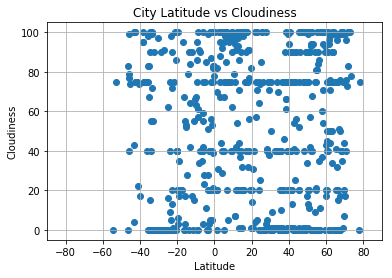

In [9]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_info["lat"], weather_info["cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

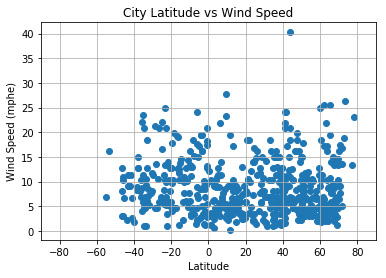

In [10]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_info["lat"], weather_info["winds"], marker="o")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mphe)")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("Lat_vs_WindSpeed.png")
plt.show()